# Machine Learning Prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Load our clean dataset

In [2]:
df = pd.read_csv('datasets/cleaned_airbnb_pricelist.csv')
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference,year
0,5162530,2015-08-31,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,Entire home/apt,1.0,0,145,92.050565,0 days,2015
1,33134899,2015-08-31,"Sunny, Private room in Bushwick",Brooklyn,Apartment,Private room,1.0,1,37,92.050565,0 days,2015
2,39608626,2015-08-31,Sunny Room in Harlem,Manhattan,Apartment,Private room,1.0,1,28,92.050565,0 days,2015
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,3.0,0,199,92.050565,2622 days,2008
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,3.0,39,549,96.000000,2622 days,2008


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         30478 non-null  int64  
 1   property_type         30478 non-null  int64  
 2   room_type             30478 non-null  int64  
 3   beds                  30478 non-null  float64
 4   number_of_reviews     30478 non-null  int64  
 5   price                 30478 non-null  object 
 6   review_scores_rating  30478 non-null  float64
 7   date_difference       30478 non-null  int64  
 8   year                  30478 non-null  int64  
 9   month                 30478 non-null  int32  
 10  day                   30478 non-null  int32  
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 2.3+ MB


#### Feature Engineering

* Drop unnecessary columns
* Create day & month columns from host_since & drop it
* Encode the categorical columns - neighbourhood, property_type, room_type
* Convert date_difference to numerical data type
* Convert the price from string to int 

In [11]:
# Dropping unnecessary columns
df = df.drop(['host_id', 'name'], axis=1)

In [12]:
# Create date & month columns from host_since & drop it
df['month'] = pd.DatetimeIndex(df['host_since']).month
df['day'] = pd.DatetimeIndex(df['host_since']).day

In [14]:
df = df.drop(['host_since'], axis=1)

KeyError: "['host_since'] not found in axis"

In [15]:
# Convert date_difference to numerical
df['date_difference'] = df['date_difference'].str.replace(' days', '')
df.head()

,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference,year,month,day
0,Brooklyn,Apartment,Entire home/apt,1.0,0,145,92.050565,0,2015,8,31
1,Brooklyn,Apartment,Private room,1.0,1,37,92.050565,0,2015,8,31
2,Manhattan,Apartment,Private room,1.0,1,28,92.050565,0,2015,8,31
3,Manhattan,Apartment,Entire home/apt,3.0,0,199,92.050565,2622,2008,6,26
4,Manhattan,Apartment,Private room,3.0,39,549,96.000000,2622,2008,6,26


In [22]:
# Change the date difference data type to an integer
df.date_difference = df.date_difference.astype('int')
df.date_difference.dtype

dtype('int64')

In [27]:
# Encoding our categorical columns
categorical_columns = ['neighbourhood', 'property_type', 'room_type']
df.neighbourhood.nunique(), df.neighbourhood.unique()

(5,
 array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
       dtype=object))

In [28]:
df.property_type.nunique(), df.property_type.unique()

(19,
 array(['Apartment', 'House', 'Other', 'Bed & Breakfast', 'Loft',
        'Condominium', 'Townhouse', 'Dorm', 'Boat', 'Cabin', 'Villa',
        'Bungalow', 'Camper/RV', 'Treehouse', 'Tent', 'Hut', 'Lighthouse',
        'Chalet', 'Castle'], dtype=object))

In [29]:
df.room_type.nunique(), df.room_type.unique()

(3, array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object))

In [31]:
# Encode our categorical data
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference,year,month,day
0,1,0,0,1.0,0,145,92.050565,0,2015,8,31
1,1,0,1,1.0,1,37,92.050565,0,2015,8,31
2,2,0,1,1.0,1,28,92.050565,0,2015,8,31
3,2,0,0,3.0,0,199,92.050565,2622,2008,6,26
4,2,0,1,3.0,39,549,96.000000,2622,2008,6,26


In [32]:
df.property_type.nunique(), df.property_type.unique()

(19,
 array([ 0, 10, 14,  1, 13,  8, 16,  9,  2,  4, 18,  3,  5, 17, 15, 11, 12,
         7,  6]))

In [35]:
# Convert the price from string to int
df.price = df.price.str.replace(',', '')
df.price = df.price.astype(int)

#### Correlation matrix

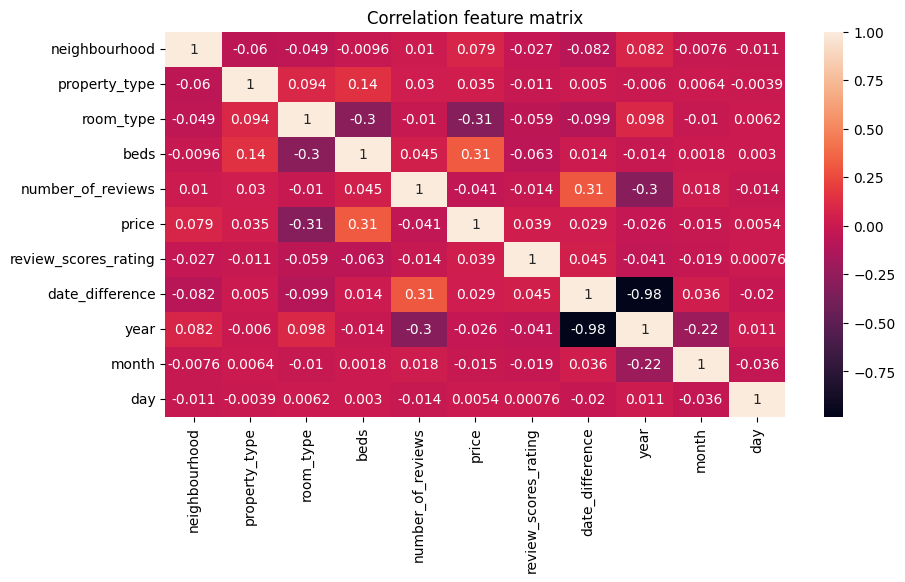

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation feature matrix')
plt.show()

#### Feature Selection

In [37]:
new_df = df.copy()

In [38]:
new_df = new_df.drop(['date_difference', 'day'], axis = 1)

In [39]:
new_df.head()

,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,year,month
0,1,0,0,1.0,0,145,92.050565,2015,8
1,1,0,1,1.0,1,37,92.050565,2015,8
2,2,0,1,1.0,1,28,92.050565,2015,8
3,2,0,0,3.0,0,199,92.050565,2008,6
4,2,0,1,3.0,39,549,96.000000,2008,6


#### Training our model

We've decided: 
- target -> price
- features -> neighbourhood, property_type, room_type, beds, number_of_reviews, price, review_scores_rating, year, month

Steps:
1. Selection of target & features
2. Split the train & test data
3. Choose our algorithm
4. Standardize data (if we have to)
5. Initialize our model
6. Train our model
7. Predict
8. Evaluation of our model performance
9. Check how to improve performance

In [40]:
# Select our target and features
X = new_df.drop(['price'], axis = 1) #features excluding our target
y = new_df['price'] #target

In [ ]:
# Splitting our dataset for 